# Gerekli Kütüphaneler

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor as SKGradientBoostingRegressor
from sklearn import datasets

seed = 42
np.random.seed(seed)

# Veri Seti

In [4]:
X, y = datasets.make_regression(
    n_samples=200,
    n_features=1,
    noise=15,
    random_state=seed
)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

# Gradient Boosting Regressor

In [7]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        # Zayif tahminci sayisi
        self.n_estimators = n_estimators
        # Ogrenme orani
        self.learning_rate = learning_rate
        # Her bir karar agacinin max derinligi
        self.max_depth = max_depth
        # Zayif karar agaclari
        self.trees = []
        # Ilk tahmin
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residual = y - y_pred

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.trees.append(tree)

            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred

# Eğitim

In [8]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Tahmin 

In [9]:
y_pred = gbr.predict(X_test)

In [10]:
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.9265116681986566


In [11]:
print("MSE Score:", mean_squared_error(y_test, y_pred))

MSE Score: 452.9624797784809


# Sonuçlar

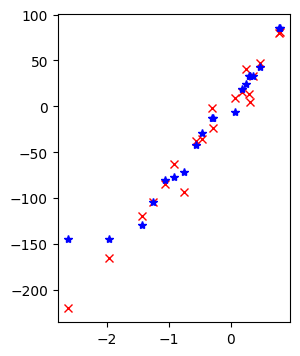

In [17]:
plt.figure(figsize=(3, 4))
plt.plot(X_test, y_test, "rx")
plt.plot(X_test, y_pred, "b*")
plt.show()

# Scikit-Learn

In [18]:
gbr2 = SKGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr2.fit(X_train, y_train)

GradientBoostingRegressor()

In [19]:
y_pred_2 = gbr2.predict(X_test)

In [20]:
print("R^2 Score:", r2_score(y_test, y_pred_2))

R^2 Score: 0.9265116681986566


In [21]:
print("MSE Score:", mean_squared_error(y_test, y_pred_2))

MSE Score: 452.9624797784809
